In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

diabetes = pd.read_csv("diabetes.csv")

print(diabetes.info())
diabetes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             764 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       764 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       766 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 54.1+ KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,764.000000,768.000000,768.000000,764.000000,762.000000,766.000000
mean,3.845052,120.894531,69.058901,20.536458,79.799479,31.958246,0.472949,33.229765
std,3.369578,31.972618,19.383024,15.952218,115.244002,7.864874,0.332197,11.767328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.500000,0.628500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [19]:
diabetes['Outcome'] = (diabetes['Outcome'] == 'POS').astype(int)
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1  


In [20]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


tf.random.set_seed(42)
tf.keras.backend.clear_session()
X_train_full, X_test, y_train_full, y_test = train_test_split(diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.1)
valid_size = int(len(X_train_full.index)*0.1) #calculating 20% of full training set, so the validation set is equal to that value
X_train, y_train = X_train_full[:-valid_size], y_train_full[:-valid_size]
X_valid, y_valid = X_train_full[-valid_size:], y_train_full[-valid_size:]


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,601 (717.19 KB)

 Trainable params: 183,601 (717.19 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

In [22]:
history = model.fit(X_train_full, y_train_full, epochs=30, verbose=2)

Epoch 1/30
22/22 - 0s - 10ms/step - accuracy: 0.6107 - loss: 0.7674
Epoch 2/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6851
Epoch 3/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6797
Epoch 4/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6750
Epoch 5/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6710
Epoch 6/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6675
Epoch 7/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6646
Epoch 8/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6621
Epoch 9/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6600
Epoch 10/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6582
Epoch 11/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6567
Epoch 12/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6554
Epoch 13/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6543
Epoch 14/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - loss: 0.6534
Epoch 15/30
22/22 - 0s - 2ms/step - accuracy: 0.6483 - l

# Conclusions
The dataset is very small, and the above cell shows that it is far from enough for a neural network to be worth using, so I will opt for RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
print(cross_val_score(dummy_clf, X_train_full, y_train_full, cv=3, scoring = 'accuracy'))

forest = RandomForestClassifier(n_estimators=500, random_state=42)
cross_val_score(forest, X_train_full, y_train_full, cv=3, scoring='accuracy')

[0.64935065 0.64782609 0.64782609]


array([0.75757576, 0.76086957, 0.75652174])

In [31]:
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(forest, X_train_full, y_train_full, cv=3)
y_train_pred_dummy = cross_val_predict(dummy_clf, X_train_full, y_train_full, cv=3)

print(accuracy_score(y_train_full, y_train_pred))
print(precision_score(y_train_full, y_train_pred))
print(accuracy_score(y_train_full, y_train_pred_dummy))
#print(precision_score(y_train_full, y_train_pred_dummy)) dummy always predicts negative

0.7583212735166426
0.6792452830188679
0.6483357452966715
0.0


C:\Users\Adam\Desktop\Studia\Cybertech\Diabetes\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


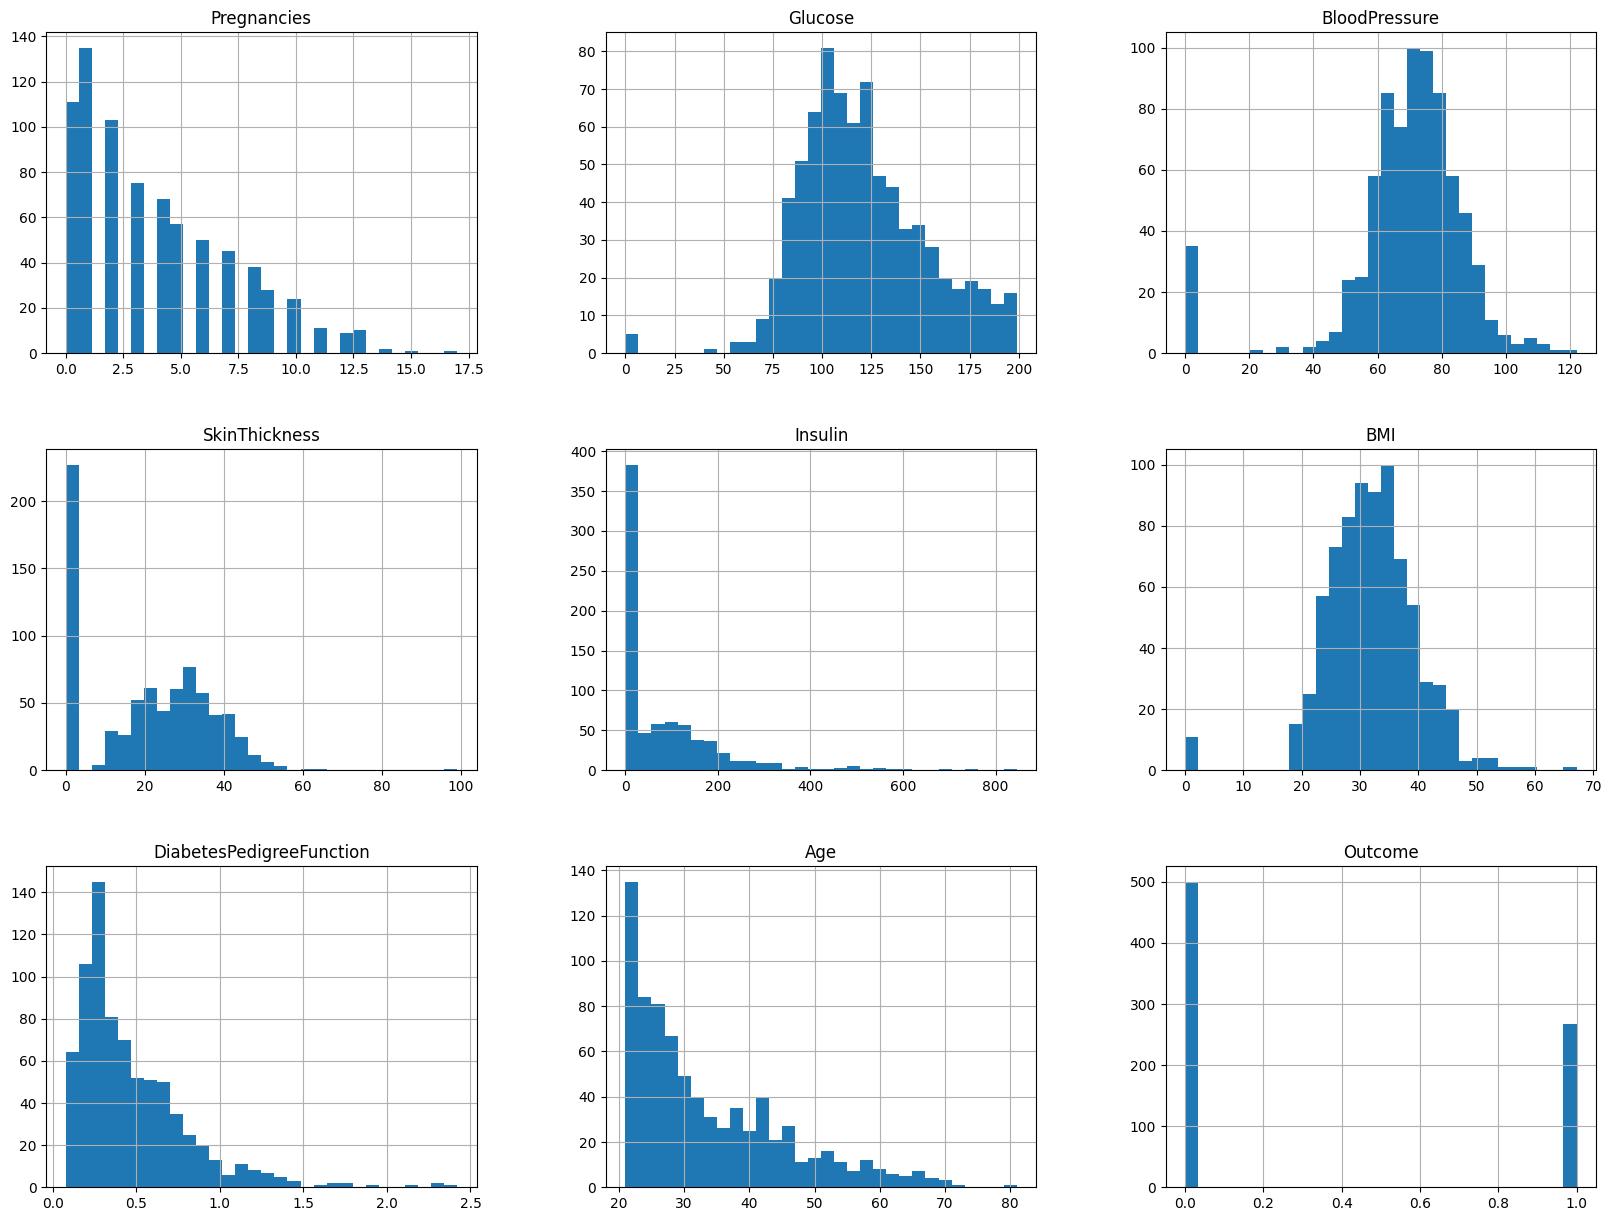

In [23]:
diabetes.hist(figsize=(20, 15), bins=30)
plt.show()

In [25]:
corr_matrix = diabetes.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.297805
Age                         0.239384
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.172274
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.063735
Name: Outcome, dtype: float64